## Seeds Dataset – K-Means and PCA 

In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
from pandas import Series, DataFrame
from sklearn.cluster import KMeans
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()

### Step A

In [2]:
cols = ['area','perimeter','compact','length','width','asym','groove','species']
seed_data = pd.read_csv('seeds.csv', names = cols)
seed_data.head() #10

,area,perimeter,compact,length,width,asym,groove,species
0,15.26,14.84,0.8710,5.763,3.312,2.221,5.220,1
1,14.88,14.57,0.8811,5.554,3.333,1.018,4.956,1
2,14.29,14.09,0.9050,5.291,3.337,2.699,4.825,1
3,13.84,13.94,0.8955,5.324,3.379,2.259,4.805,1
4,16.14,14.99,0.9034,5.658,3.562,1.355,5.175,1


In [3]:
seed_data.tail() #10

,area,perimeter,compact,length,width,asym,groove,species
205,12.19,13.20,0.8783,5.137,2.981,3.631,4.870,3
206,11.23,12.88,0.8511,5.140,2.795,4.325,5.003,3
207,13.20,13.66,0.8883,5.236,3.232,8.315,5.056,3
208,11.84,13.21,0.8521,5.175,2.836,3.598,5.044,3
209,12.30,13.34,0.8684,5.243,2.974,5.637,5.063,3


In [4]:
seed_data.shape

(210, 8)

In [5]:
seed_data.dtypes

area         float64
perimeter    float64
compact      float64
length       float64
width        float64
asym         float64
groove       float64
species        int64
dtype: object

In [3]:
seed_data.groupby(['species']).describe().T

species                  1          2          3
area      count  70.000000  70.000000  70.000000
          mean   14.334429  18.334286  11.873857
          std     1.215704   1.439496   0.723004
          min    11.230000  15.380000  10.590000
          25%    13.750000  17.330000  11.262500
          50%    14.355000  18.720000  11.835000
          75%    15.045000  19.137500  12.425000
          max    17.080000  21.180000  13.370000
perimeter count  70.000000  70.000000  70.000000
          mean   14.294286  16.135714  13.247857
          std     0.576583   0.616995   0.340196
          min    12.630000  14.660000  12.410000
          25%    13.960000  15.737500  13.002500
          50%    14.320000  16.210000  13.250000
          75%    14.732500  16.557500  13.470000
          max    15.460000  17.250000  13.950000
compact   count  70.000000  70.000000  70.000000
          mean    0.880070   0.883517   0.849409
          std     0.016191   0.015500   0.021760
          min     0.839200   0.845200   0.808100
          25%     0.868850   0.872525   0.834000
          50%     0.880500   0.882600   0.849350
          75%     0.890400   0.898225   0.861825
          max     0.918300   0.910800   0.897700
length    count  70.000000  70.000000  70.000000
          mean    5.508057   6.148029   5.229514
          std     0.231508   0.268191   0.138015
          min     4.902000   5.363000   4.899000
          25%     5.384500   5.979250   5.136250
          50%     5.534000   6.148500   5.224000
          75%     5.677000   6.312000   5.323750
          max     6.053000   6.675000   5.541000
width     count  70.000000  70.000000  70.000000
          mean    3.244629   3.677414   2.853771
          std     0.177616   0.185539   0.147516
          min     2.850000   3.231000   2.630000
          25%     3.134250   3.554250   2.725500
          50%     3.243500   3.693500   2.834500
          75%     3.378500   3.804750   2.967000
          max     3.683000   4.033000   3.232000
asym      count  70.000000  70.000000  70.000000
          mean    2.667403   3.644800   4.788400
          std     1.173901   1.181868   1.336465
          min     0.765100   1.472000   1.661000
          25%     1.826500   2.845500   4.048750
          50%     2.545500   3.609500   4.839000
          75%     3.301000   4.436000   5.467250
          max     6.685000   6.682000   8.456000
groove    count  70.000000  70.000000  70.000000
          mean    5.087214   6.020600   5.116400
          std     0.263699   0.253934   0.162068
          min     4.519000   5.144000   4.745000
          25%     4.924500   5.877500   5.002000
          50%     5.094000   5.981500   5.091500
          75%     5.223500   6.187750   5.228500
          max     5.877000   6.550000   5.491000

Question 1: Five of these features are directly associated with size of the seed.  Which ones are they? Using the mean of the features in the descriptive statistics, state which species is the smallest and which species is the largest.

Answer 1: area,	perimeter,	groove,	species / Smallest is species3, Largest is species2

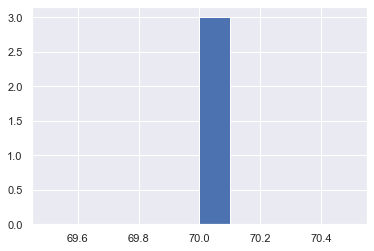

In [4]:
seed_data['species'].value_counts().hist();

### Step B

In [5]:
seed_corr = seed_data.corr()
seed_corr

,area,perimeter,compact,length,width,asym,groove,species
area,1.000000,0.994341,0.608288,0.949985,0.970771,-0.229572,0.863693,-0.346058
perimeter,0.994341,1.000000,0.529244,0.972422,0.944829,-0.217340,0.890784,-0.327900
compact,0.608288,0.529244,1.000000,0.367915,0.761635,-0.331471,0.226825,-0.531007
length,0.949985,0.972422,0.367915,1.000000,0.860415,-0.171562,0.932806,-0.257269
width,0.970771,0.944829,0.761635,0.860415,1.000000,-0.258037,0.749131,-0.423463
asym,-0.229572,-0.217340,-0.331471,-0.171562,-0.258037,1.000000,-0.011079,0.577273
groove,0.863693,0.890784,0.226825,0.932806,0.749131,-0.011079,1.000000,0.024301
species,-0.346058,-0.327900,-0.531007,-0.257269,-0.423463,0.577273,0.024301,1.000000


In [6]:
grps = ['NegStrong','NegMedium','Weak', 'PosMedium', 'PosStrong']
cols = ['area','perimeter','compact','length','width','asym','groove','species']
for col in cols:
    seed_corr[col] = pd.cut(seed_corr[col], (-1,-0.8,-0.6,0.6,0.8,1), labels = grps)
seed_corr

,area,perimeter,compact,length,width,asym,groove,species
area,PosStrong,PosStrong,PosMedium,PosStrong,PosStrong,Weak,PosStrong,Weak
perimeter,PosStrong,PosStrong,Weak,PosStrong,PosStrong,Weak,PosStrong,Weak
compact,PosMedium,Weak,PosStrong,Weak,PosMedium,Weak,Weak,Weak
length,PosStrong,PosStrong,Weak,PosStrong,PosStrong,Weak,PosStrong,Weak
width,PosStrong,PosStrong,PosMedium,PosStrong,PosStrong,Weak,PosMedium,Weak
asym,Weak,Weak,Weak,Weak,Weak,PosStrong,Weak,Weak
groove,PosStrong,PosStrong,Weak,PosStrong,PosMedium,Weak,PosStrong,Weak
species,Weak,Weak,Weak,Weak,Weak,Weak,Weak,PosStrong


Question 2: Disregarding the ‘species’ column, there are two features that according to the correlation matrices, that seem to be the least correlated features.  Which two are they?  Please state a plausible reason why the other five features are all positively correlated with each other? 

Answer 2:asym & compact / becaue it is obvious when we want to calculate area or perimeter we use length & width & froove parameters

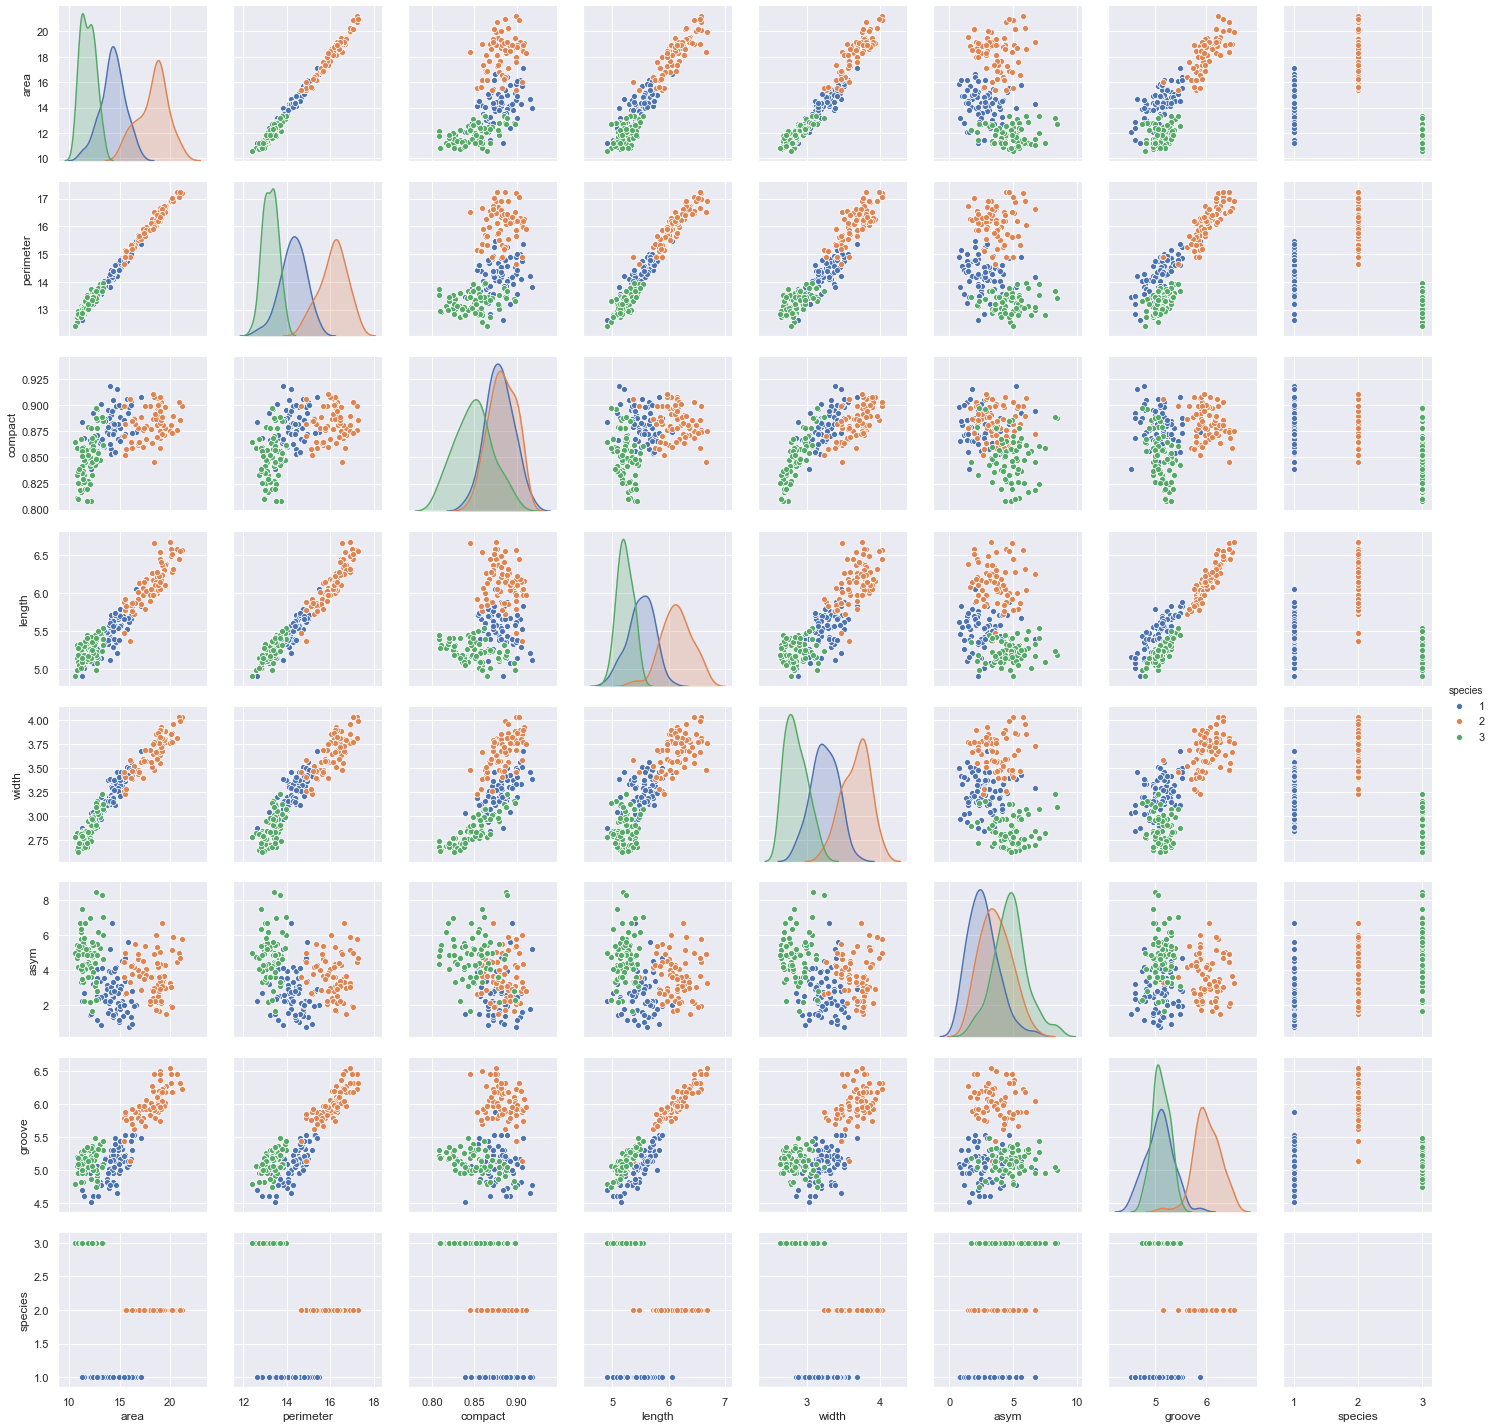

In [8]:
sns.pairplot(seed_data, hue='species', height=2.5);

Question 3: Note the shapes of the individual scatter plots in the matrix.  Do the shapes reflect the correlation values for the two features being plotted? Give an example proving your conclusion.

Answer 3: Yes, for example area and perimeter have the correlation of 0.994341 and it is looks like a linear relationship they have.

In [9]:
spec_cat = pd.factorize (seed_data['species'])
Y_seed = spec_cat[0]
seed_names = ['Area','Perimeter','Compact','Length','Width','Asym','Groove','Species']
spec_cat

(array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
        2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
        2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
        2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2], dtype=int64),
 Int64Index([1, 2, 3], dtype='int64'))

### Area vs Perimeter

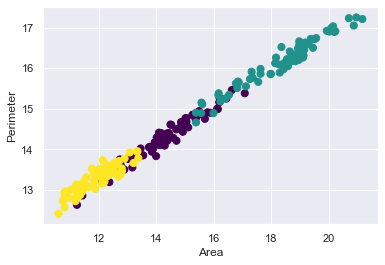

In [10]:
x = 0  # Column Area
y = 1  # Column Perimeter
plt.scatter(seed_data.iloc[:,x], 
            seed_data.iloc[:,y], 
            c = Y_seed, s = 50, 
            cmap = 'viridis');
plt.xlabel (seed_names[x]);
plt.ylabel (seed_names[y]);

### Area vs Width

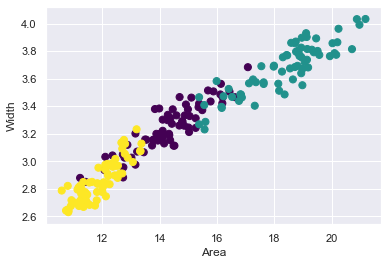

In [11]:
x = 0  # Column Area
y = 4  # Column Width
plt.scatter(seed_data.iloc[:,x], 
            seed_data.iloc[:,y], 
            c = Y_seed, s = 50, 
            cmap = 'viridis');
plt.xlabel (seed_names[x]);
plt.ylabel (seed_names[y]);

### Perimeter vs Length

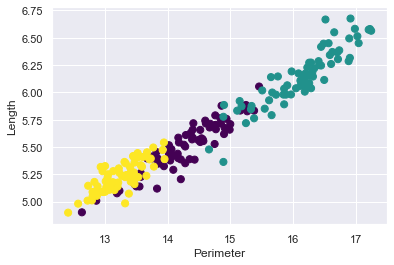

In [12]:
x = 1  # Column Perimeter
y = 3  # Column Length
plt.scatter (seed_data.iloc[:,x],
            seed_data.iloc[:, y], 
            c = Y_seed, s = 50, 
            cmap = 'viridis');
plt.xlabel (seed_names[x]);
plt.ylabel (seed_names[y]);

### Groove vs Length

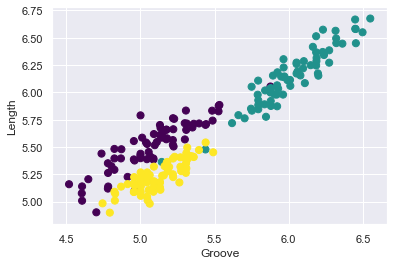

In [13]:
x = 6  # Column Groove
y = 3  # Column Length
plt.scatter (seed_data.iloc[:,x],
            seed_data.iloc[:, y], 
            c = Y_seed, s = 50, 
            cmap = 'viridis');
plt.xlabel (seed_names[x]);
plt.ylabel (seed_names[y]);

### Compactness vs Width 

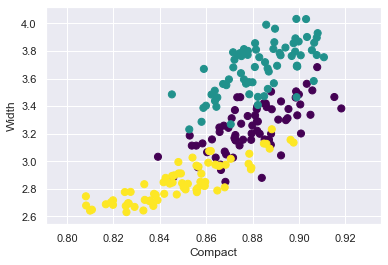

In [14]:
x = 2  # Column Compactness
y = 4  # Column Width
plt.scatter (seed_data.iloc[:,x],
            seed_data.iloc[:, y], 
            c = Y_seed, s = 50, 
            cmap = 'viridis');
plt.xlabel (seed_names[x]);
plt.ylabel (seed_names[y]);

### Step C : K-means Clustering

In [15]:
X_seed = seed_data.drop ('species', axis=1)
# or X_iris = seed_data.iloc[:, :4]

In [16]:
kmeans = KMeans(n_clusters=3, random_state = 1)
kmeans.fit (X_seed)
y_model = kmeans.predict (X_seed)
y_model

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 1, 2, 2,
       2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 1, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 2, 2,
       2, 2, 2, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 0, 0, 0, 0, 0, 0, 0,
       2, 2, 2, 2, 0, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1])

In [17]:
y_test = np.choose (Y_seed,[2,0,1]).astype (int)
y_test

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

Question 4: Check the accuracy of the clustering.  What is this accuracy? 

Answer 4: 0.89523809523809528

In [20]:
acc_score = accuracy_score (y_test, y_model)
acc_score

0.89523809523809528

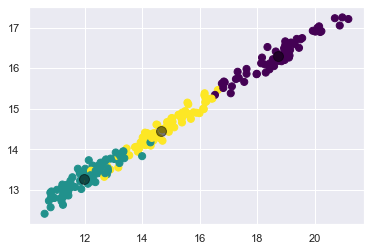

In [18]:
plt.scatter(X_seed.iloc[:,0], X_seed.iloc[:,1], c = y_model, s = 50, cmap = 'viridis')
centers = kmeans.cluster_centers_
plt.scatter(centers[:,0], centers[:,1], c = 'black', s = 100, alpha = 0.5);

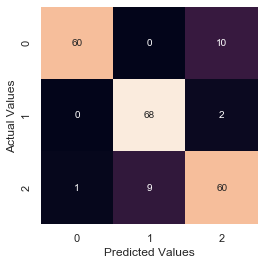

In [19]:
mat = confusion_matrix (y_test, y_model)
sns.heatmap (mat, square=True, annot=True, cbar=False);
plt.xlabel('Predicted Values');
plt.ylabel('Actual Values');

Question 5: Each of the cells in the confusion matrix represent a value from the list below.  Use the explanation given at the top of this document to fill in this list and compute the other statistics from the confusion matrix. 

### Answer 5:
	Kama(2): C1 = 70, Rosa(1): C2 = 70, Canadian(0): C3 = 70
	TC1 = 60, TC2 = 68, TC3 = 60
	FC1C2 - NumOfRosa ClassAsKama = 0
	FC1C3 - NumOfCanadian ClassAsKama = 1
	FC2C1 - NumOfKama ClassAsRosa = 0
	FC2C3 - NumOfCanadian ClassAsRosa = 9
	FC3C1 - NumOfKama ClassAsCanadian = 10
	FC3C2 - NumOfRosa ClassAsCanadian = 2
	TC1R = 60/70, TC2R = 68/70, TC3R = 60/70

### Step D : PCA

In [20]:
model = PCA (n_components=2) 
model.fit (X_seed) 
X_2D = model.transform(X_seed)

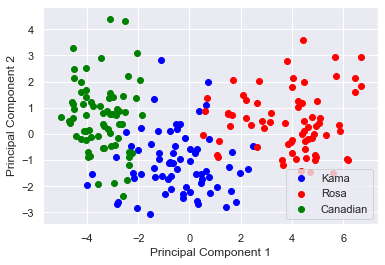

In [21]:
for label, color, i in zip(('Kama','Rosa','Canadian'), ('blue','red','green'), (0, 1, 2)):
    plt.scatter (X_2D[Y_seed == i, 0], 
                 X_2D[Y_seed == i, 1], 
                 label=label, color=color);
plt.xlabel('Principal Component 1');
plt.ylabel('Principal Component 2');
plt.legend(loc='lower right');

### Step E

In [25]:
X_std_seed = StandardScaler().fit_transform(X_seed)

In [26]:
kmeans = KMeans(n_clusters=3, random_state = 1)
kmeans.fit(X_std_seed)
y_model = kmeans.predict(X_std_seed)

Question 6: Check the accuracy of the clustering.  What is this accuracy?  Does the standardization improve the accuracy?

Answer 6: 0.919047619047619 / Yes the accuracy is more aftre standardization

In [27]:
acc_score = accuracy_score(y_test, y_model)
acc_score

0.919047619047619

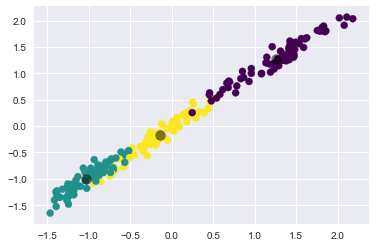

In [28]:
plt.scatter (X_std_seed[:,0], X_std_seed[:,1], c = y_model, s = 50, cmap = 'viridis')
centers = kmeans.cluster_centers_
plt.scatter (centers[:,0], centers[:,1], c = 'black', s = 100, alpha = 0.5);

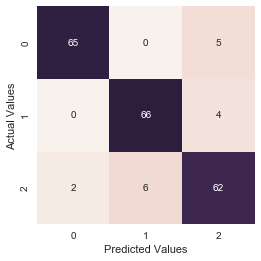

In [29]:
mat = confusion_matrix (y_test, y_model)
sns.heatmap (mat, square=True, annot=True, cbar=False)
plt.xlabel ('Predicted Values')
plt.ylabel ('Actual Values');

### Step F : Normalization Before K-Means

In [30]:
X_norm_seed = MinMaxScaler().fit_transform(X_seed)

In [31]:
kmeans = KMeans(n_clusters=3, random_state = 1)
kmeans.fit(X_norm_seed)
y_model = kmeans.predict(X_norm_seed)

Question 7: Check the accuracy of the clustering.  What is this accuracy?  Does the normalization improve the accuracy?

Answer 7: 0.89047619047619042 / No because the accuracy is less aftre standardization

In [32]:
acc_score = accuracy_score (y_test, y_model)
acc_score

0.89047619047619042

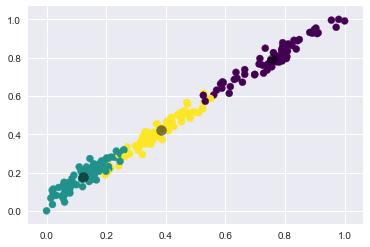

In [33]:
plt.scatter (X_norm_seed[:,0], X_norm_seed[:,1], c = y_model, s = 50, cmap = 'viridis')
centers = kmeans.cluster_centers_
plt.scatter (centers[:,0], centers[:,1], c = 'black', s = 100, alpha = 0.5);

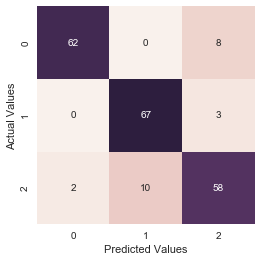

In [34]:
mat = confusion_matrix (y_test, y_model)
sns.heatmap (mat, square=True, annot=True, cbar=False)
plt.xlabel ('Predicted Values')
plt.ylabel ('Actual Values');